In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Based on the EDA results, we can address your specific questions:

Are older employees more likely to leave? Examine the box plot, histogram, and correlation coefficient for Age vs. Attrition. If older employees tend to have higher attrition rates, the box plot might show a higher median age for the "Attrition = Yes" group, the histogram might show a shift towards older ages for that group, and the correlation coefficient might be positive.
Is distance from home related to attrition? Similarly, analyze the box plot, histogram, and correlation coefficient for DistanceFromHome vs. Attrition. If employees living farther away have higher attrition rates, the box plot might show a higher median distance for the "Attrition = Yes" group, and the

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df= df[['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber']]

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


In [6]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [8]:
df.shape

(1470, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1470 non-null   int64 
 1   Attrition         1470 non-null   object
 2   BusinessTravel    1470 non-null   object
 3   DailyRate         1470 non-null   int64 
 4   Department        1470 non-null   object
 5   DistanceFromHome  1470 non-null   int64 
 6   Education         1470 non-null   int64 
 7   EducationField    1470 non-null   object
 8   EmployeeCount     1470 non-null   int64 
 9   EmployeeNumber    1470 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 115.0+ KB


In [10]:
df.duplicated().any()

False

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,1,2,1102,2,1,2,1,1,1
1,49,0,1,279,1,8,1,1,1,2
2,37,1,2,1373,1,2,2,4,1,4
3,33,0,1,1392,1,3,4,1,1,5
4,27,0,2,591,1,2,1,3,1,7
...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061
1466,39,0,2,613,1,6,1,3,1,2062
1467,27,0,2,155,1,4,3,1,1,2064
1468,49,0,1,1023,2,2,3,3,1,2065


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df['DailyRate'] = sc.fit_transform(df[['DailyRate']])
df['DistanceFromHome'] = sc.fit_transform(df[['DistanceFromHome']])


# EDA

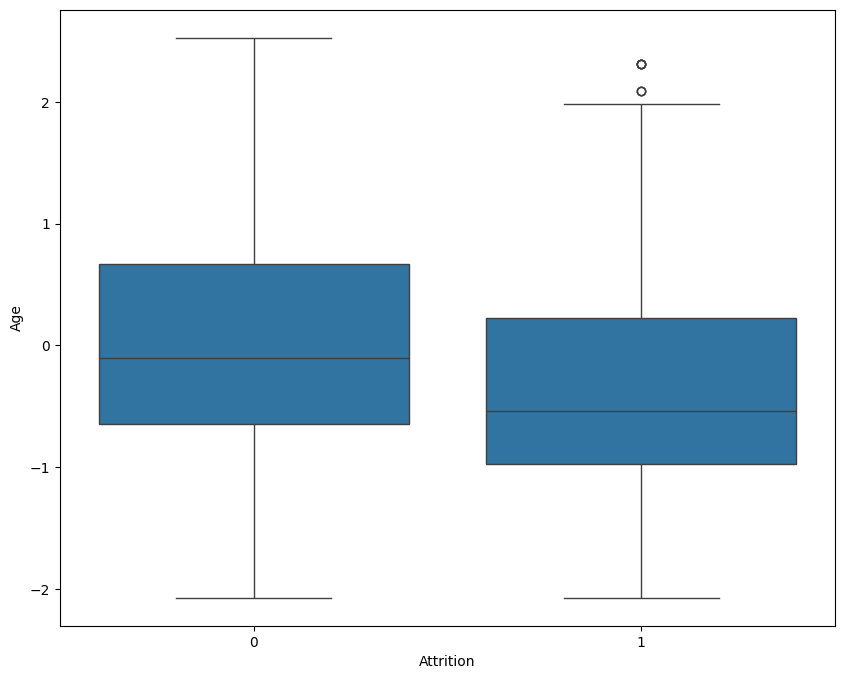

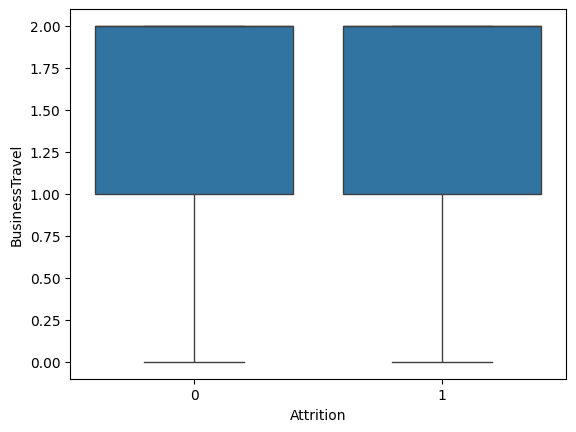

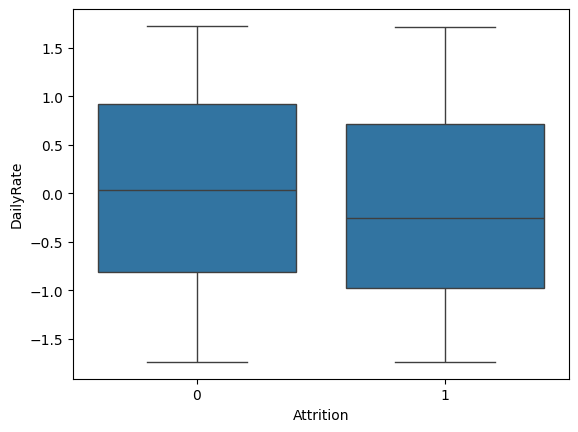

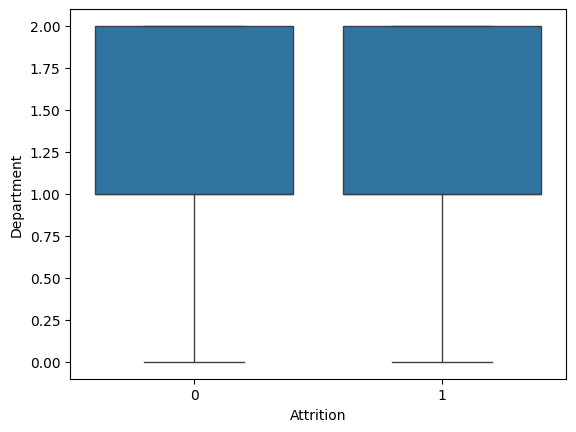

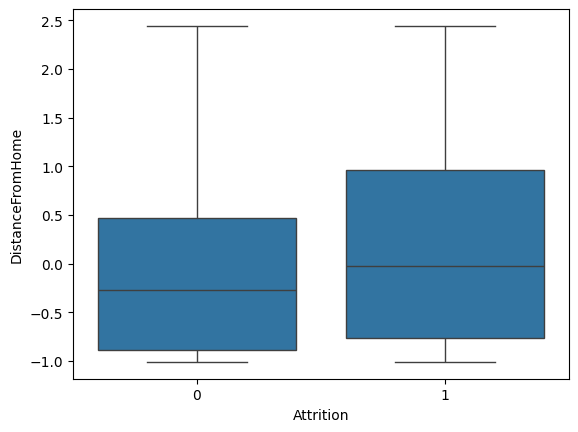

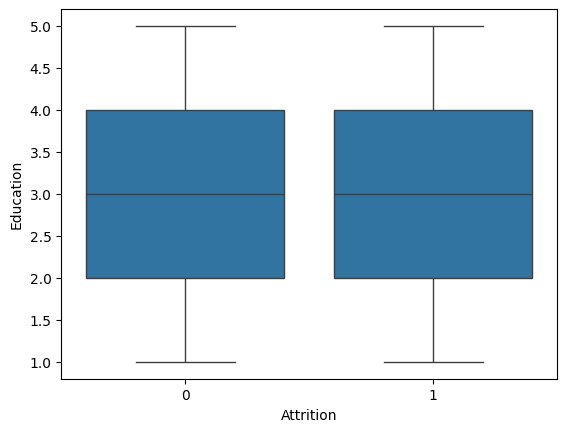

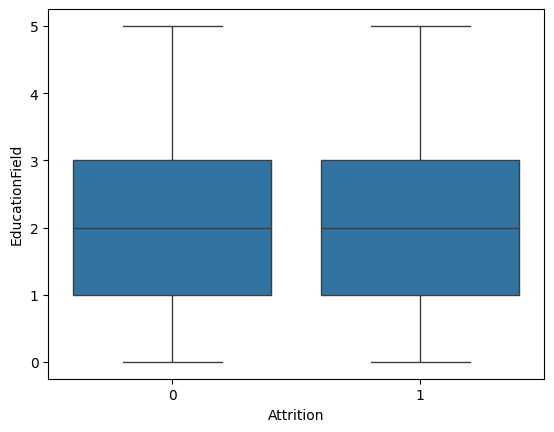

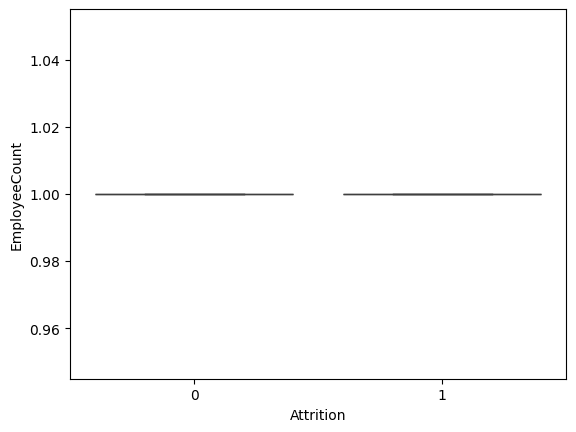

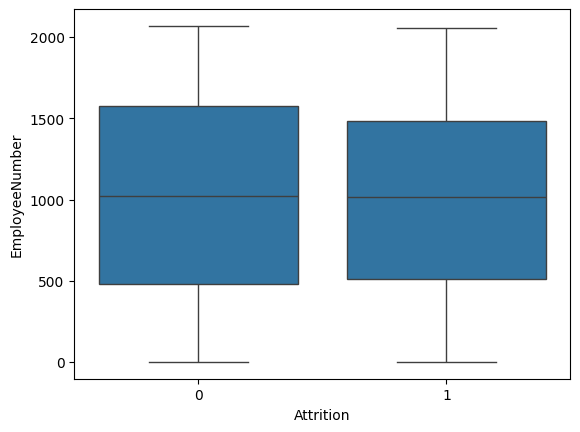

In [14]:
#Box plots: Box plots are useful for comparing the distribution of numerical features (Age, DistanceFromHome) across different attrition categories (Yes/No). They help identify potential differences in medians, quartiles, and outliers.
columns = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber']


plt.figure(figsize=(10,8))
for column in columns:
  sns.boxplot(x='Attrition',y=column,data=df)
  plt.show()

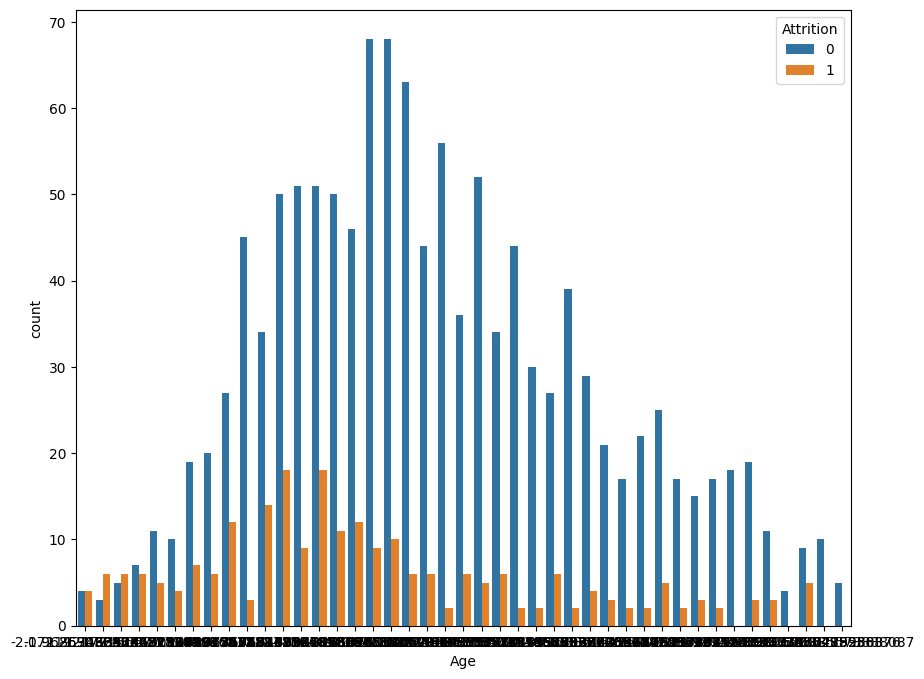

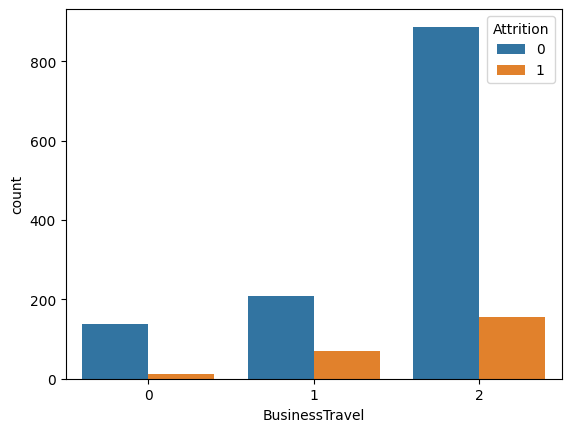

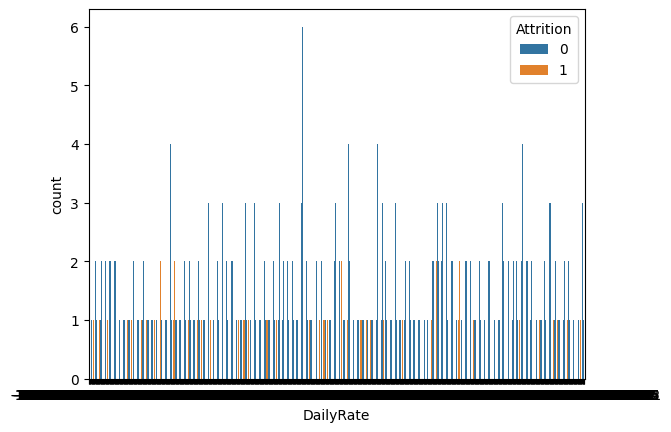

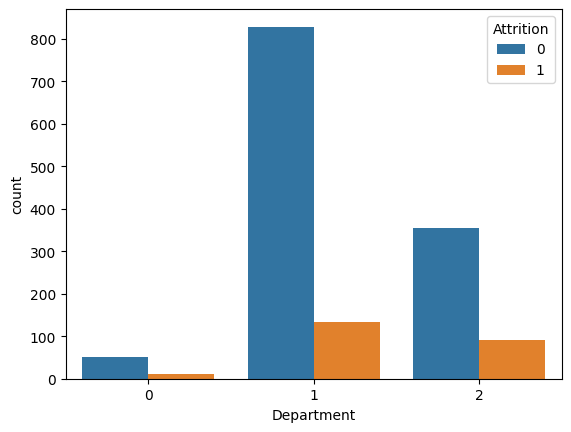

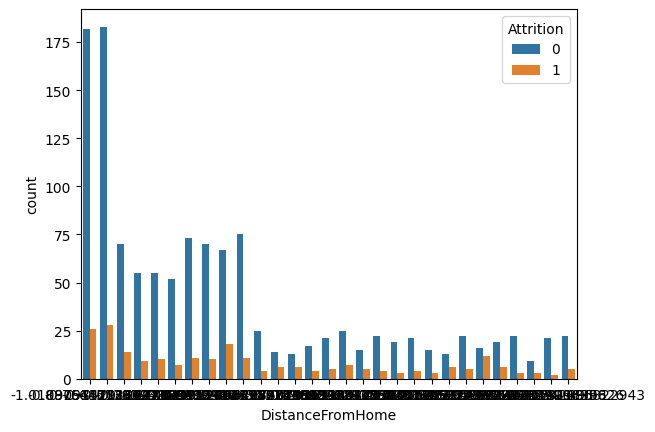

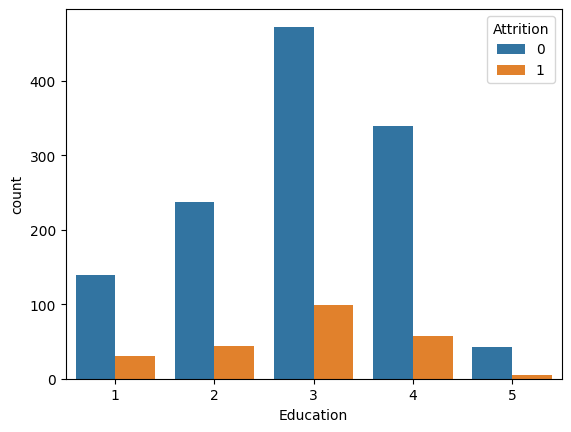

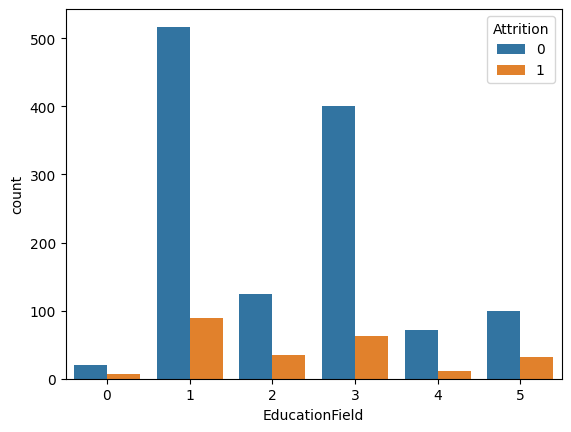

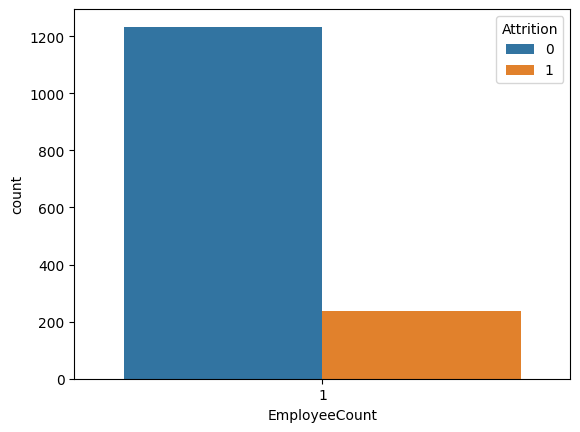

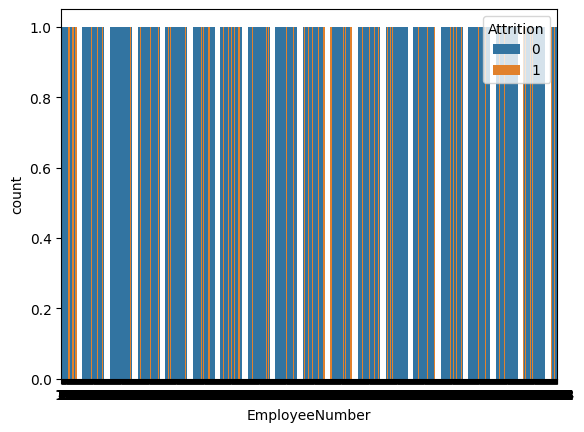

In [15]:
columns = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber']

plt.figure(figsize=(10,8))
for column in columns:
  sns.countplot(x=column, hue='Attrition', data=df)
  plt.show()

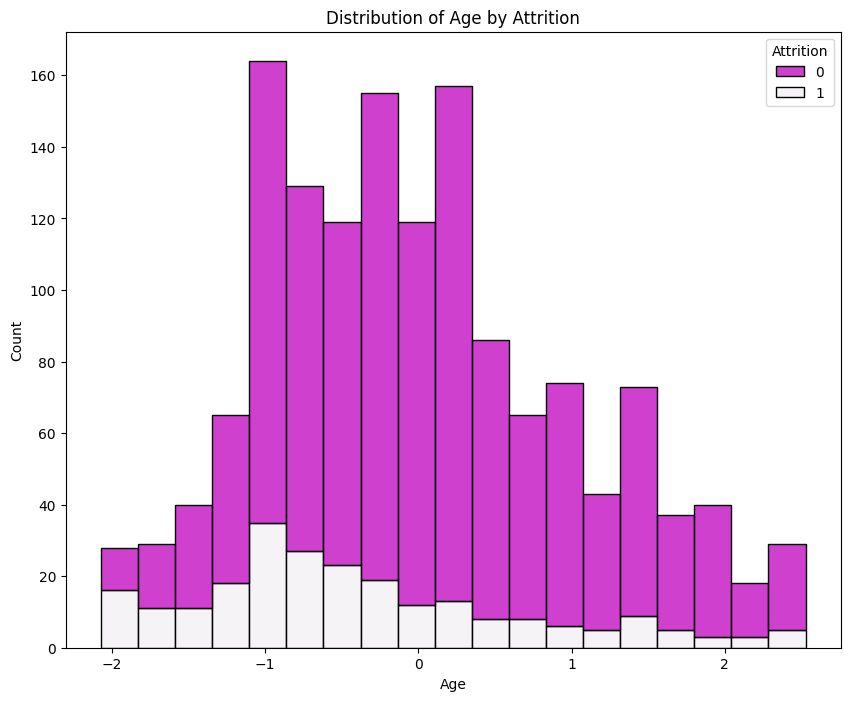

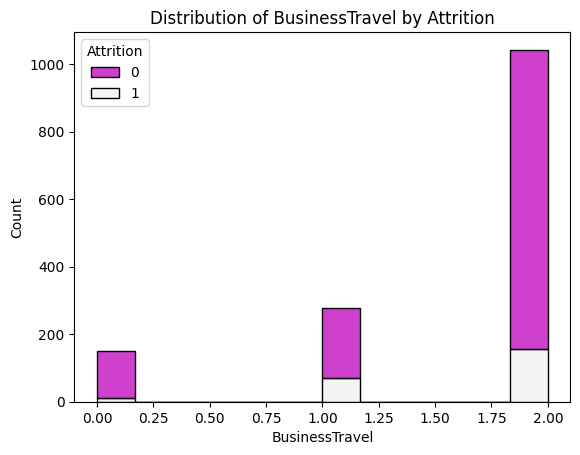

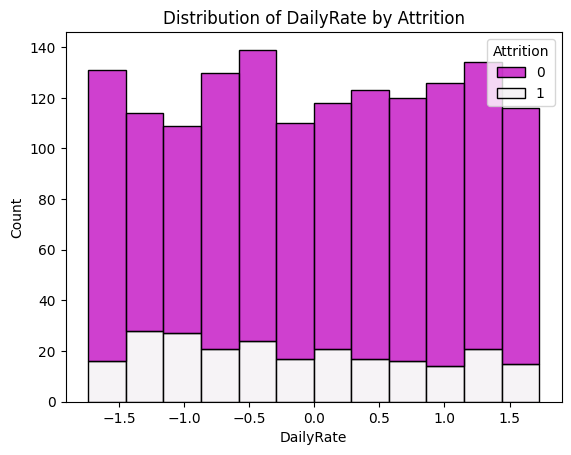

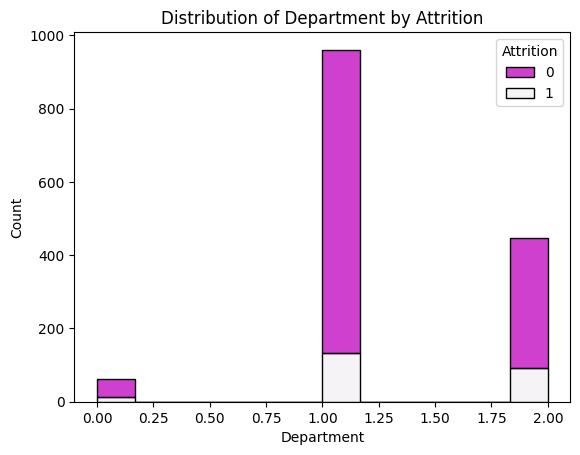

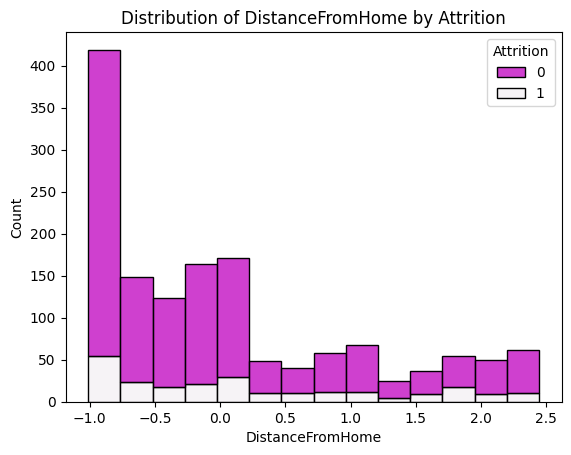

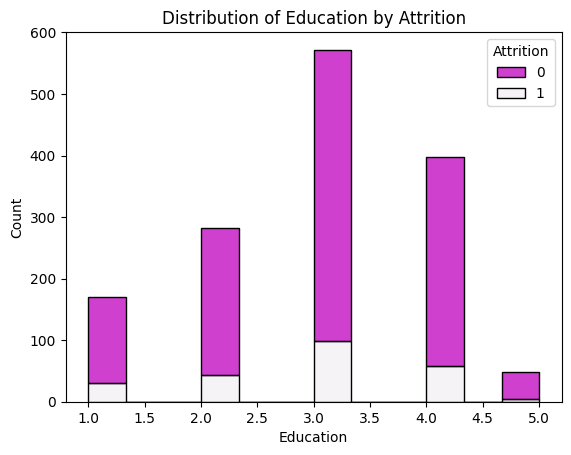

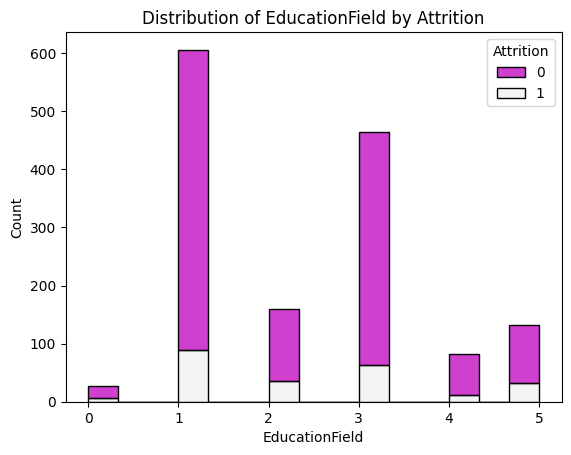

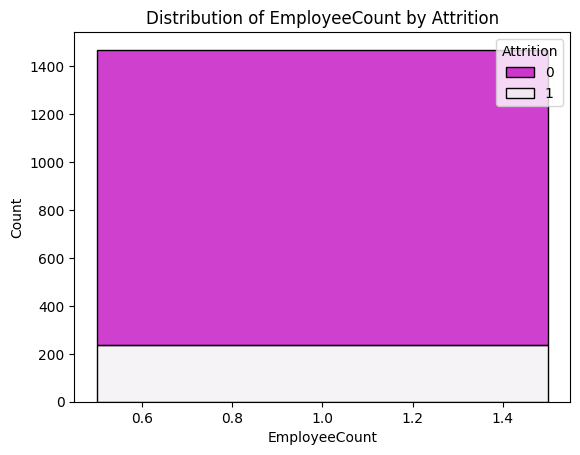

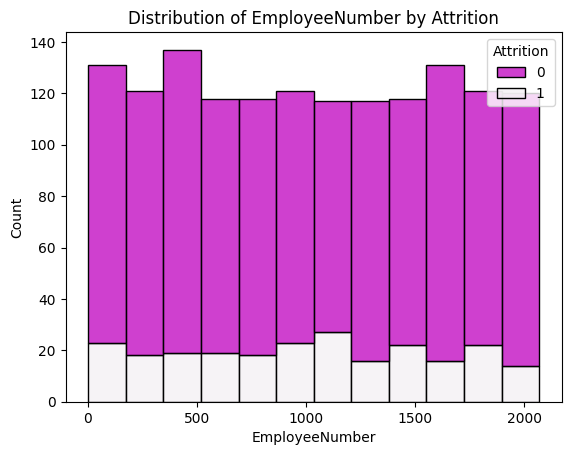

In [16]:
columns = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber']

plt.figure(figsize=(10,8))
for column in columns:
  sns.histplot(data=df, x=column, hue='Attrition', multiple ="stack", palette="light:m_r"  )
  plt.title(f'Distribution of {column} by Attrition')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

**Correlation Matrix**

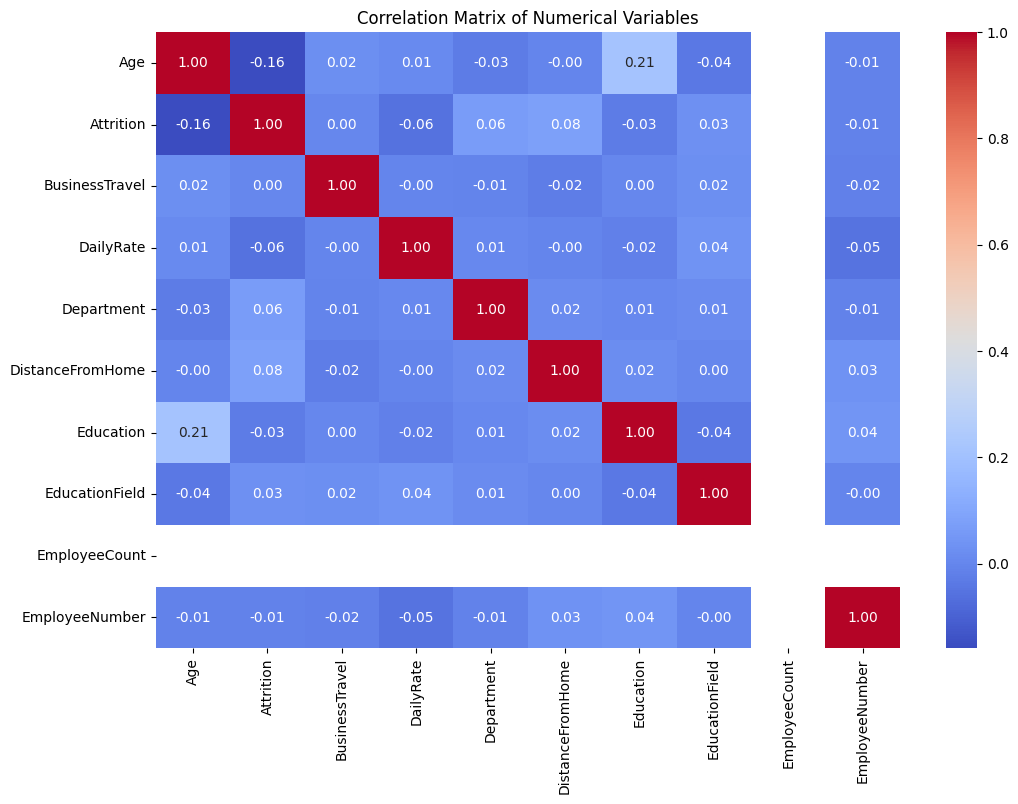

In [17]:
correlation = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**MODEL BUILDING**

In [18]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state =99)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       369
           1       0.00      0.00      0.00        72

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.76       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y_pred))


accuracy_score: 0.8367346938775511


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =10,random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [28]:
y_pred = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       369
           1       0.36      0.11      0.17        72

    accuracy                           0.82       441
   macro avg       0.61      0.54      0.54       441
weighted avg       0.77      0.82      0.78       441



In [29]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{'{:.2f}%'.format(accuracy*100)}")


Accuracy:82.31%


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[355  14]
 [ 64   8]]


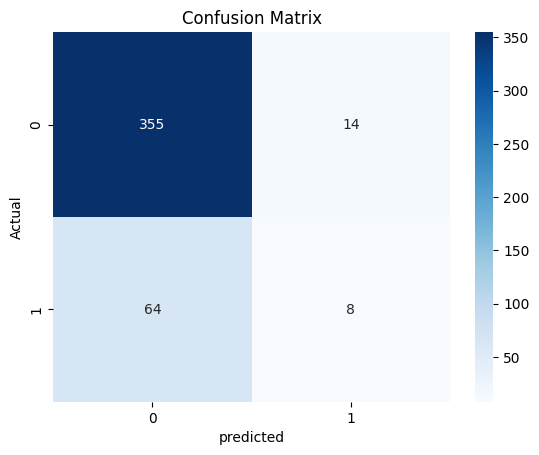

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap= "Blues",fmt ="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
# Assuming 'classifier' is Logistic Regression model and 'clf' is Random Forest model

# For Logistic Regression
scores_lr = cross_val_score(classifier, x, y, cv=5)  # cv=5 specifies 5 folds
print("Logistic Regression Cross-Validation Scores:", scores_lr)
print("Average Accuracy:", scores_lr.mean())

# For Random Forest
scores_rf = cross_val_score(clf, x, y, cv=5)  # cv=5 specifies 5 folds
print("Random Forest Cross-Validation Scores:", scores_rf)
print("Average Accuracy:", scores_rf.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Average Accuracy: 0.8387755102040817
Random Forest Cross-Validation Scores: [0.82993197 0.82653061 0.82653061 0.82312925 0.83333333]
Average Accuracy: 0.8278911564625849


**INSIGHTS and RECOMMENTATIONS**

* Distance From Home: Employees who live farther away from work tend to have higher attrition rates. This is evident from the box plot, which shows a higher median distance for the "Attrition = Yes" group.
* Business Travel: Employees who travel frequently for business may be more prone to attrition. The count plot and histogram reveal a higher proportion of attrition among employees with frequent business travel.
* Department: Certain departments might have higher attrition rates than others. You can identify these departments by examining the count plot for the 'Department' variable.
*Age: While not as strong as other factors, there might be a slight tendency for younger employees to have higher attrition rates. This can be observed in the box plot and histogram for 'Age'.

**Recommendations for the HR Department to Reduce Attrition:**

* Distance From Home: Offer flexible work arrangements, such as remote work or compressed workweeks, to employees who live far away. Consider providing transportation assistance or relocation packages to reduce the burden of commuting.
* Business Travel: Minimize unnecessary business travel and ensure that employees who travel frequently receive adequate support and recognition for their efforts. Offer travel perks and opportunities for rest and relaxation to mitigate the negative impacts of travel.
* Department: Identify departments with high attrition rates and investigate the underlying causes. Implement targeted interventions, such as improved work-life balance initiatives, career development opportunities, or leadership training, to address specific concerns within those departments